# Mapas en México

Aquí, vamos a construir un mapa de la Republica Mexicana usando Python, en particular la librería `geopandas`.

Primero vamos a descargar el mapa de México, este se encuentra en el siguiente archivo. 



In [408]:
import zipfile
import os

mexico_data = "..\\medium_data\\mexico_data"
zlist = os.listdir(mexico_data)

Ahora crearemos una carpeta para guardar los datos.

In [409]:
folder_path = mexico_data + '\\Mexico'
os.mkdir(mexico_data + '\\Mexico')


FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: '..\\medium_data\\mexico_data\\Mexico'

In [410]:
mg_zip = mexico_data + "\\mg_2023_integrado.zip"

with zipfile.ZipFile(mg_zip, 'r') as cvegeo:
    cvegeo.extractall(folder_path)

mg_path = mexico_data + "\\Mexico\\conjunto_de_datos"

mg_list = os.listdir(mg_path)
mg_list

['00a.cpg',
 '00a.dbf',
 '00a.prj',
 '00a.shp',
 '00a.shx',
 '00ent.cpg',
 '00ent.dbf',
 '00ent.prj',
 '00ent.shp',
 '00ent.shx',
 '00l.cpg',
 '00l.dbf',
 '00l.prj',
 '00l.shp',
 '00l.shx',
 '00lpr.cpg',
 '00lpr.dbf',
 '00lpr.prj',
 '00lpr.shp',
 '00lpr.shx',
 '00mun.cpg',
 '00mun.dbf',
 '00mun.prj',
 '00mun.shp',
 '00mun.shx']

In [411]:
import fiona

geo_path_base = "..\\medium_data\\mexico_data\\Mexico\\conjunto_de_datos"
geo_paths = []
for file in mg_list:
    if file.endswith(".shp"):
        geo_paths.append(os.path.join(geo_path_base, file))


In [412]:
import geopandas as gpd

def cvegeo(shape):
    municipies = fiona.open(shape)
    df = gpd.GeoDataFrame.from_features([feature for feature in municipies])
    # Get the order of the fields in the Fiona Collection; add geometry to the end
    columns = list(municipies.meta["schema"]["properties"]) + ["geometry"]
    # Re-order columns in the correct order
    df = df[columns]
    return df

mexico_cvegeo = cvegeo(geo_paths[1])


Ahora visualizamos el dataframe.

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

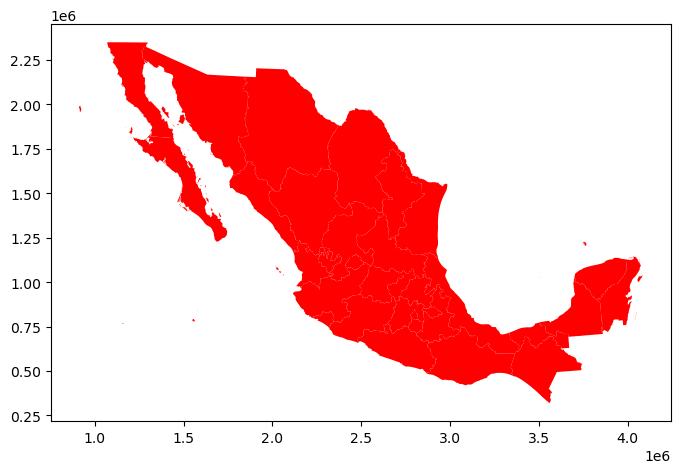

In [413]:
mexico_cvegeo.plot(figsize = (8,8), color = 'red')

# color: definir un color del mapa. 

Notemos ahora, que si colocamos información, podemos graficar segun el valor.


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

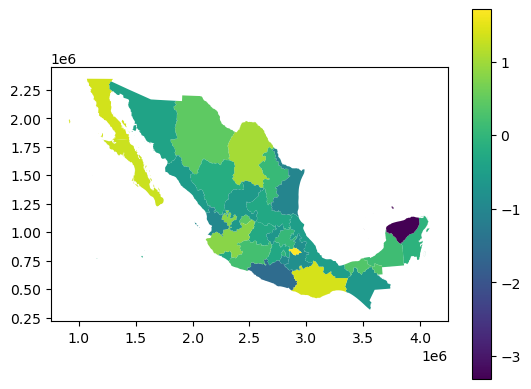

In [414]:
import numpy as np
import matplotlib.pyplot as plt

mexico = mexico_cvegeo.copy()
mexico['C1'] = np.random.standard_normal(size = len(mexico.index))

mexico.plot('C1', legend = True)

A partir de aqui, iremos avanzando para darle la forma que necesitmos. Primero, los colores. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

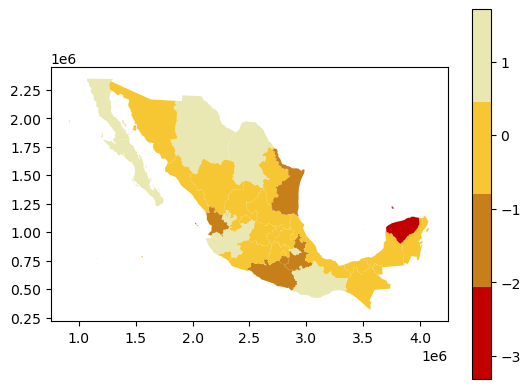

In [415]:
from matplotlib.colors import ListedColormap

article_colors = {
    'rojo' : "#C20000",
    'cafe' : "#C67F19",
    'amarillo' : "#F6C733",
    'vainilla' : "#E9E7B2"
}

def new_cmap(colors: dict):
    return ListedColormap(list(colors.values()))

mexico.plot('C1', legend = True, 
            cmap = new_cmap(article_colors))

Ahora, agregaremos los nombres de los estados.

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0     Annotation(2.46281e+06, 1.10987e+06, 'Aguascal...
1     Annotation(1.24376e+06, 2.11025e+06, 'Baja Cal...
2     Annotation(1.50116e+06, 1.57513e+06, 'Baja Cal...
3           Annotation(3.72258e+06, 810060, 'Campeche')
4     Annotation(2.49563e+06, 1.69195e+06, 'Coahuila...
5             Annotation(2.27793e+06, 794913, 'Colima')
6            Annotation(3.51849e+06, 533627, 'Chiapas')
7      Annotation(2.0648e+06, 1.86622e+06, 'Chihuahua')
8     Annotation(2.79986e+06, 811847, 'Ciudad de Méx...
9       Annotation(2.20734e+06, 1.43371e+06, 'Durango')
10         Annotation(2.6022e+06, 988745, 'Guanajuato')
11          Annotation(2.72091e+06, 632700, 'Guerrero')
12           Annotation(2.82343e+06, 944974, 'Hidalgo')
13           Annotation(2.33211e+06, 953331, 'Jalisco')
14            Annotation(2.74656e+06, 819530, 'México')
15    Annotation(2.51249e+06, 801076, 'Michoacán de ...
16           Annotation(2.80782e+06, 752932, 'Morelos')
17       Annotation(2.2064e+06, 1.09005e+06, 'Na

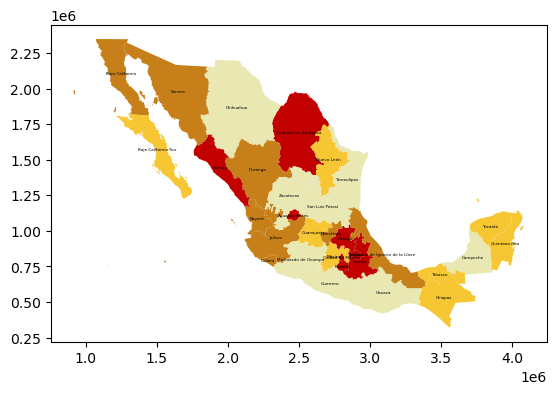

In [416]:
ax = mexico.plot(legend = True, 
            cmap = new_cmap(article_colors))

mexico.apply(lambda x: ax.annotate(text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=3,
                                   horizontalalignment='center', 
                                   verticalalignment='center'), axis=1)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


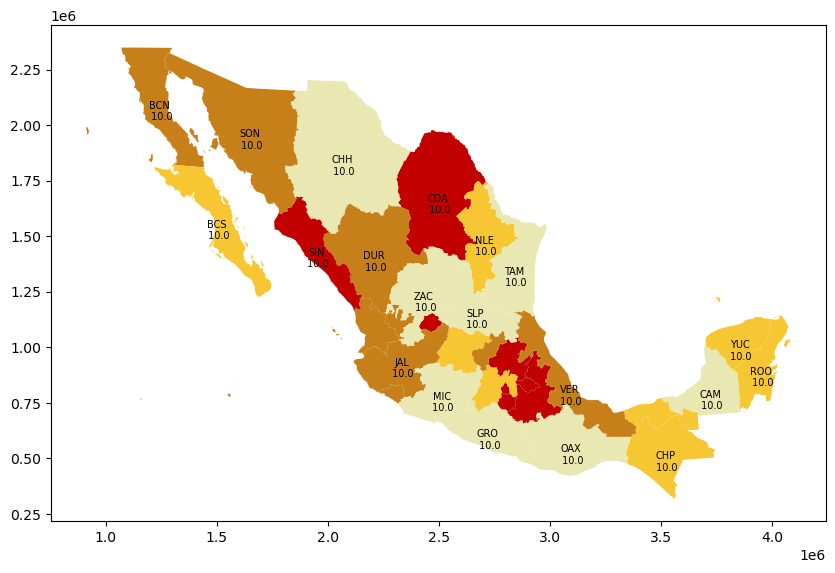

In [417]:
import pandas as pd
Abreviatura = pd.read_excel("..\\raw_data\\Abreviaturas.xlsx")
mexico_abr = list(Abreviatura['Abreviatura'])

abr = []
for t in mexico_abr:
    u = t.replace('MX-','')
    abr.append(u)
mexico = mexico_cvegeo.copy()
mexico['Abreviatura'] = abr
mexico.set_index('NOMGEO',drop=True,inplace=True)

ax = mexico.plot(figsize=(10,10), legend = True, 
            cmap = new_cmap(article_colors))
area_limit = mexico.geometry.area['Yucatán']
mini_estados = []
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        ax.annotate(text = mexico.loc[estado,'Abreviatura'] + "\n 10.0",
                    xy=mexico.loc[estado,:].geometry.centroid.coords[0], 
                    fontsize=7,
                    horizontalalignment='center', 
                    verticalalignment='top')
    else:
        mini_estados.append([estado, mexico.loc[estado,:].geometry.centroid.coords[0]])


Hay estados muy pequeños, entonces vamos a agregar flechas hacia cada estado. 

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


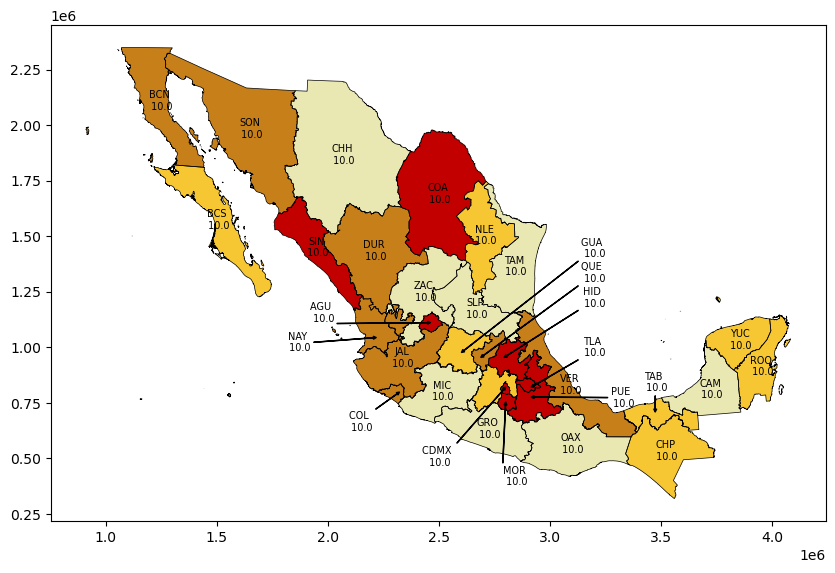

In [418]:
def arrow(text, position, text_position):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=7,
                xycoords=ax.transAxes)
def text_block(content, pos):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=7,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 
    
ax = mexico.plot(figsize=(10,10), legend = True, 
            cmap = new_cmap(article_colors))
area_limit = mexico.geometry.area['Yucatán']
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        text_block(mexico.loc[estado,'Abreviatura'] + "\n 10.0",
                   mexico.loc[estado,:].geometry.centroid.coords[0])
mexico.boundary.plot(lw=0.5, color='black', ax=ax)


_ = arrow('NAY \n 10.0',(0.42,0.37), (0.32, 0.36))
_ = arrow('COL \n 10.0',(0.45,0.26), (0.40, 0.20))
_ = arrow('AGU \n 10.0', (0.49, 0.4), (0.35, 0.42))
_ = arrow('GUA \n 10.0', (0.53, 0.34), (0.70, 0.55))
_ = arrow('QUE \n 10.0',(0.555, 0.33), (0.70, 0.50))
_ = arrow('HID \n 10.0', (0.585, 0.33), (0.70, 0.45))
_ = arrow('TLA \n 10.0', (0.62, 0.27), (0.70, 0.35))
_ = arrow('PUE \n 10.0', (0.62, 0.25), (0.738, 0.249))
_ = arrow('TAB \n 10.0', (0.78, 0.22), (0.78, 0.28))
_ = arrow('CDMX \n 10.0', (0.587, 0.27), (0.50, 0.13))
_ = arrow('MOR \n 10.0', (0.587, 0.24), (0.60, 0.09))

Ahora, llenaremos los datos. Primero la descargamos. 

In [419]:
import requests as r

def downcsv(url):
    down = r.get(url)
    with open("..\\raw_data\\encig.xlsx", "wb") as data:
        data.write(down.content)
    return "..\\raw_data\\encig.xlsx"

url_encig = "https://www.inegi.org.mx/contenidos/programas/encig/2021/tabulados/"
data = "VI_confianza_institucional_encig_2021_est.xlsx"


Ahora leemos el documento que nos interesa.

In [420]:
encig = pd.read_excel(downcsv(url_encig + data),sheet_name=None, header=None,skiprows=9,skipfooter=12)
data_encig = encig['6.1'].copy()
data_encig = data_encig.dropna(axis= 1, how ="all")
data_encig = data_encig.dropna(axis= 0, how ="all")
data_encig.reset_index(inplace=True,drop=True)
data_encig.head()

,0,1,3,4,6,7,9,10,12,13
0,Estados Unidos Mexicanos,51302010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Familiares,51199385.0,22616030.0,44.172464,21795591.0,42.570025,4618359.0,9.020341,1550340.0,3.028044
2,Escuelas públicas de nivel básico,50878862.0,10404999.0,20.450534,29766660.0,58.504964,6221821.0,12.228695,1624841.0,3.193548
3,Universidades públicas,50863575.0,14364196.0,28.240634,25789250.0,50.702787,4752842.0,9.344294,1107318.0,2.177035
4,Compañeros de trabajo,36592602.0,8214952.0,22.449762,18532468.0,50.645395,5177081.0,14.147890,1494856.0,4.085132


Ahora, aqui se encuentran los 31 estados. Entonces Debemos extraerlos todos. 

In [421]:
na_step = data_encig.isna().sum(axis = 1)
blocks = []
for k, i in enumerate(na_step):
    if i > 0:
        blocks.append(k)
blocks.append(len(data_encig))
df_blocks = [data_encig.iloc[blocks[i]:blocks[i + 1],:] for i in range(len(blocks) - 1)]


Ahora, demos el formato adecuado. 

In [424]:
fed_gob = []

for k in range(len(df_blocks)):
    test = df_blocks[k]     
    test = test.set_index(test.columns[0], drop=True)
    et = test.index[0]
    edata = test.loc['Gobierno Federal',:]
    fed_gob.append([et] + list(edata))
cols = ['Total', 'MuchaC Abs', 'MuchaC Rel', 'AlgoC Abs',
         'AlgoC Rel', 'AlgoD Abs', 'AlgoD Rel', 'MuchaD Abs', 'Mucha Rel']

gob_fed = pd.DataFrame(data = fed_gob)
gob_fed = gob_fed.set_index(0, drop=True)
gob_fed.columns = cols

encig_perc = round(gob_fed['MuchaC Rel'] + gob_fed['AlgoC Rel'],1)
gob_fed

,Total,MuchaC Abs,MuchaC Rel,AlgoC Abs,AlgoC Rel,AlgoD Abs,AlgoD Rel,MuchaD Abs,Mucha Rel
0,,,,,,,,,
Estados Unidos Mexicanos,51256462.0,6797693.0,13.262119,20915663.0,40.805905,13249085.0,25.848614,8744912.0,17.061092
Aguascalientes,685283.0,69531.0,10.146319,288008.0,42.027600,182186.0,26.585513,108169.0,15.784574
Baja California,2076032.0,235683.0,11.352571,728334.0,35.082985,680342.0,32.771267,346540.0,16.692421
Baja California Sur,213315.0,12719.0,5.962544,81711.0,38.305323,75346.0,35.321473,31366.0,14.704076
Campeche,340843.0,82823.0,24.299458,159270.0,46.728259,61156.0,17.942572,32925.0,9.659873
Coahuila de Zaragoza,1629399.0,347056.0,21.299633,772448.0,47.406927,274413.0,16.841363,192167.0,11.793735
Colima,325450.0,55166.0,16.950684,153043.0,47.025042,71964.0,22.112152,36047.0,11.076049
Chiapas,815009.0,119044.0,14.606464,369892.0,45.385020,225841.0,27.710246,89473.0,10.978161
Chihuahua,2021143.0,154349.0,7.636718,709972.0,35.127252,622504.0,30.799602,373556.0,18.482413


Finalmente, juntamos todo. 

In [425]:
perc_mexico = encig_perc[0]
mexico.loc[:, 'Confianza Positiva %'] = encig_perc[1:]
mexico.iloc[14,-1] = encig_perc[15]
print(perc_mexico)
mexico


54.1


,CVEGEO,CVE_ENT,geometry,Abreviatura,Confianza Positiva %
NOMGEO,,,,,
Aguascalientes,01,01,"POLYGON ((2469550.852 1159302.643, 2469738.209...",AGU,52.2
Baja California,02,02,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",BCN,46.4
Baja California Sur,03,03,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",BCS,44.3
Campeche,04,04,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",CAM,71.0
Coahuila de Zaragoza,05,05,"POLYGON ((2469501.165 1978862.429, 2469539.651...",COA,68.7
Colima,06,06,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",COL,64.0
Chiapas,07,07,"POLYGON ((3558179.782 698365.650, 3558487.689 ...",CHP,60.0
Chihuahua,08,08,"POLYGON ((1915797.897 2202988.590, 1916038.390...",CHH,42.8
Ciudad de México,09,09,"POLYGON ((2800966.250 846721.791, 2801109.455 ...",CMX,49.1


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Aguascalientes
Colima
Ciudad de México
Guanajuato
Hidalgo
México
Morelos
Nayarit
Puebla
Querétaro
Tabasco
Tlaxcala


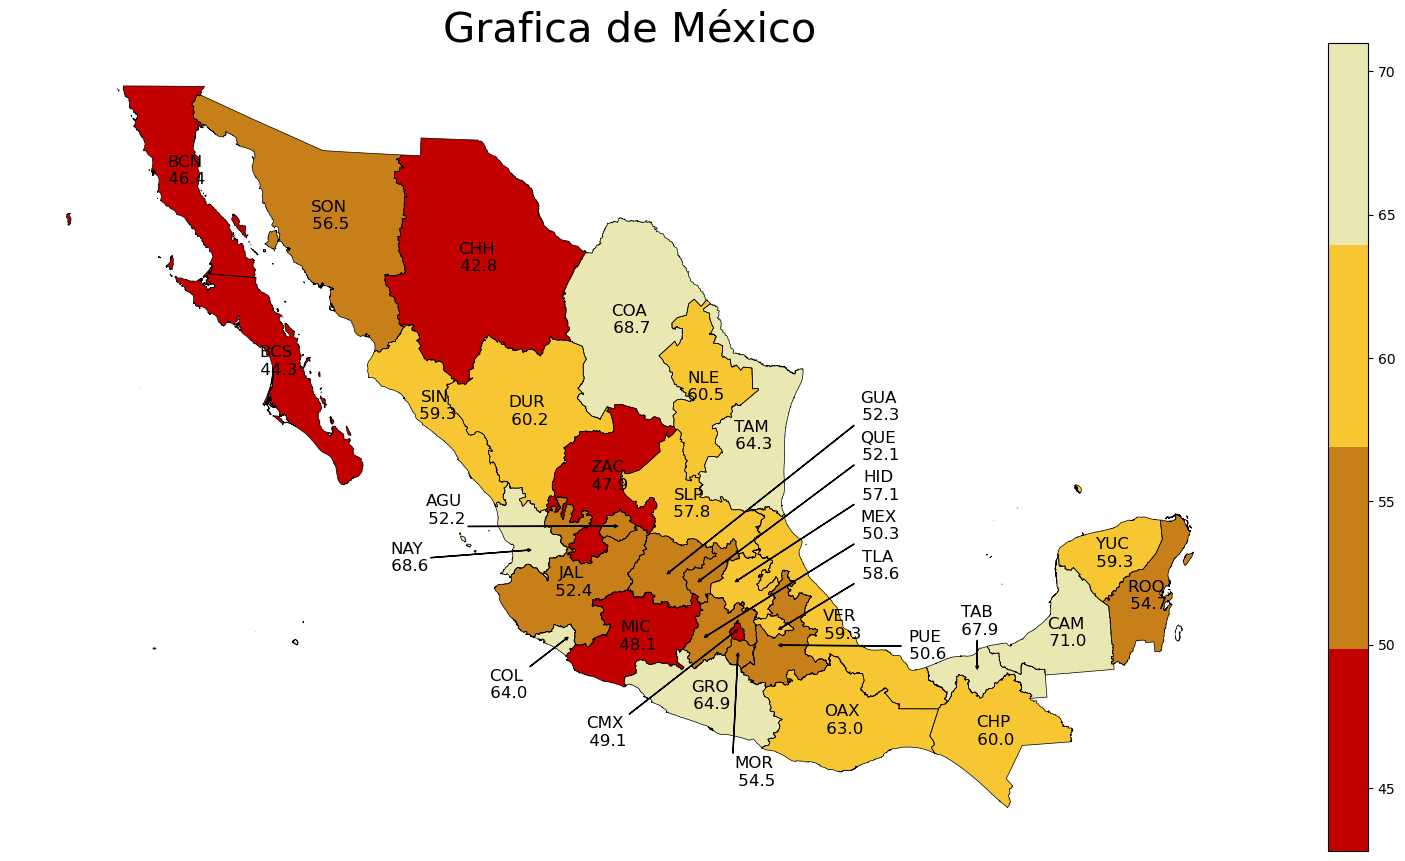

In [471]:
def arrow(text, position, text_position):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=12,
                xycoords=ax.transAxes)
    return text_position

def text_block(content, pos):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=12,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 

arrow_positions = [(0.490, 0.400), (0.450, 0.260), (0.587, 0.270), 
                   (0.530, 0.340), (0.585, 0.330), (0.560, 0.260), 
                   (0.587, 0.240), (0.420, 0.370), (0.620, 0.250),
                   (0.555, 0.330), (0.780, 0.220), (0.620, 0.270)]
texti_positions = [(0.350, 0.420), (0.400, 0.200), (0.480, 0.140),
                   (0.700, 0.550), (0.700, 0.450), (0.700, 0.400),
                   (0.600, 0.090), (0.320, 0.360), (0.738, 0.249),
                   (0.700, 0.500), (0.780, 0.280), (0.700, 0.350)]

# Por esto pedimos la posición de regreso. :)


ax = mexico.plot('Confianza Positiva %', figsize=(20,15), cmap = new_cmap(article_colors),
                  legend=True, legend_kwds = {'shrink': 0.7})
mexico.boundary.plot(lw=0.5, color='black', ax=ax)
ax.set_axis_off()
ax.set_title('Grafica de México', fontsize = 30)
area_limit = mexico.geometry.area['Yucatán']
mini = 0
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        text_block(mexico.loc[estado,'Abreviatura'] + f"\n {mexico.loc[estado,'Confianza Positiva %']}",
                   mexico.loc[estado,:].geometry.centroid.coords[0])
    else:
        _ = arrow(mexico.loc[estado,'Abreviatura'] + f"\n {mexico.loc[estado,'Confianza Positiva %']}",
                  arrow_positions[mini], texti_positions[mini])
        print(estado)
        mini +=1

plt.savefig('Mexico.png')

In [ ]:
def arrow(text, position, text_position):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=7,
                xycoords=ax.transAxes)
    return text_position
def text_block(content, pos):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=7,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 
    
ax = mexico.plot(figsize=(10,10), legend = True, 
            cmap = new_cmap(article_colors))
area_limit = mexico.geometry.area['Yucatán']
for estado in mexico.index:
    if mexico.geometry.area[estado] >= area_limit:
        text_block(mexico.loc[estado,'Abreviatura'] + "\n 10.0",
                   mexico.loc[estado,:].geometry.centroid.coords[0])
mexico.boundary.plot(lw=0.5, color='black', ax=ax)


In [ ]:
def order_dict_values(data: dict):
    sorted_tidy = dict(sorted(data.items(), key=lambda item:item[1]))
    ds = list(sorted_tidy.keys())
    return ds

KeyError: 'data1'

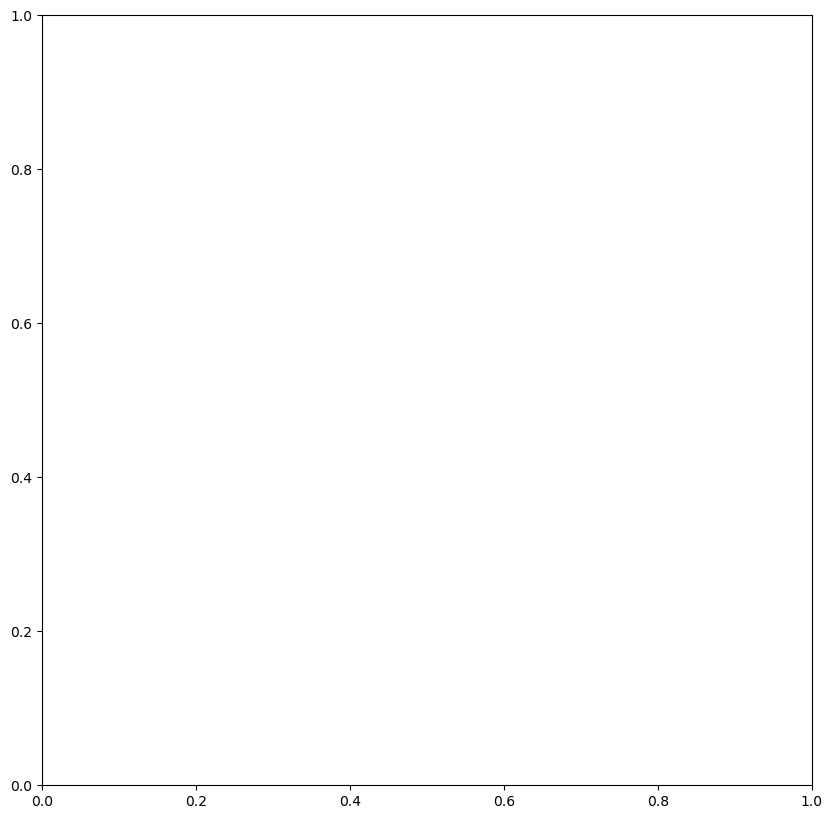

In [ ]:

# mexico.plot('data1',figsize=(5,5))



ax = mexico.plot('data1',figsize=(10,10))
mexico.apply(lambda x: ax.annotate( text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)
x, y, arrow_length = 0.7, 1, 0.1

ax.annotate('XD', xy=(0.5, 0.5), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='blue', width=0.4, headwidth=6),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
axins = ax.inset_axes([1.1, 0.5, 0.4, 0.4])
axins.set(xlim=(2e6, 3e6), ylim=(0.75e6, 1.5e6))
ax.indicate_inset_zoom(axins)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDepr

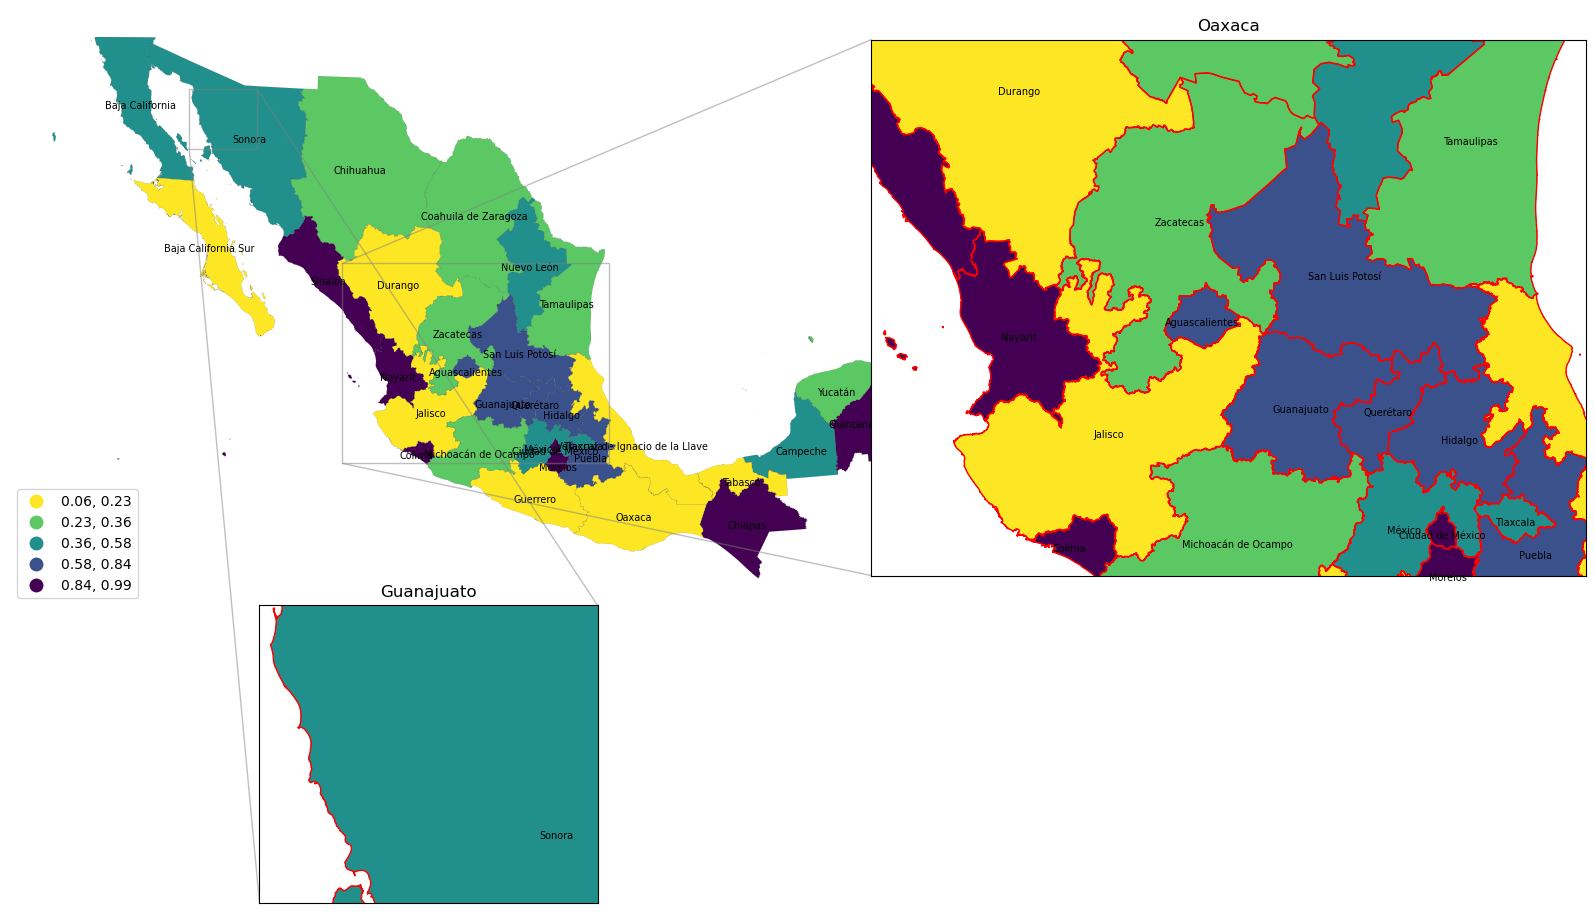

In [ ]:
fig, ax = plt.subplots()


# Añade recuadro 1
axins = ax.inset_axes([0.86, 0.05, 0.9, 0.9])
# Añade recuadro 2
axins2 = ax.inset_axes([0.2, -0.5, 0.5, 0.5])

# Gráfica principal
mexico.plot(column='data1', legend=True, ax=ax, scheme='quantiles', k=5, cmap='viridis_r', legend_kwds={'loc': 'lower left'})
mexico.boundary.plot(lw=0.05, color='k', ax=ax)

# Gráfica recuadro 1
mexico.plot(column='data1', legend=False, ax=axins, scheme='quantiles', k=5, cmap='viridis_r')
mexico.boundary.plot(lw=0.25, color='k', ax=axins)
mexico.boundary.plot(lw=1, color='red', ax=axins)

# Gráfica recuadro 2
mexico.plot(column='data1', legend=False, ax=axins2, scheme='quantiles', k=5, cmap='viridis_r')
mexico.boundary.plot(lw=0.25, color='k', ax=axins2)
mexico.boundary.plot(lw=1, color='red', ax=axins2)

# limita área a mostrar recuadro 1 y 2
axins.set(ylabel='', xlabel='', xlim=(2e6, 3e6), ylim=(0.75e6, 1.5e6), xticks=[], yticks=[], title='Oaxaca')
axins2.set(ylabel='', xlabel='', xlim=(1425000, 1680000), ylim=(2229203-300000, 2453767-300000), xticks=[], yticks=[], title='Guanajuato')

mexico.apply(lambda x: ax.annotate( text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)
mexico.apply(lambda x: axins.annotate( text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)
mexico.apply(lambda x: axins2.annotate( text = x['NOMGEO'], 
                                   xy=x.geometry.centroid.coords[0], 
                                   fontsize=7,
                                   horizontalalignment='center', 
                                   verticalalignment='top'), axis=1)

# Elimina marco de la gráfica principal
ax.set_axis_off()
# Establece líneas de los recuadros a la gráfica principal
ax.indicate_inset_zoom(axins)
ax.indicate_inset_zoom(axins2)

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)
